In [14]:
import sys
print("Python version is: {}".format(sys.version))

Python version is: 3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


In [55]:
import scipy
import numpy
import matplotlib
import pandas
import sklearn
from sklearn.model_selection import train_test_split

In [16]:
# loading the libraries

In [17]:
from pandas import read_csv
from matplotlib import pyplot


In [18]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
#reading the iris dataset
dataset = read_csv(url, sep=',', names=names)

In [19]:
#shape
print(dataset.shape)
#head 20 instances
dataset.head(20)

(150, 5)


,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [20]:
#statistical description
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [21]:
#grouping by class
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


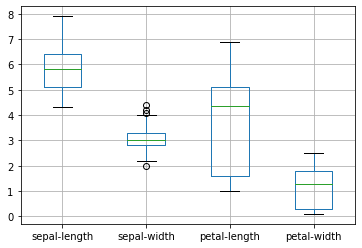

In [22]:
# looking at Univariate plots to better understand each attribute
dataset.boxplot() #for same subplot

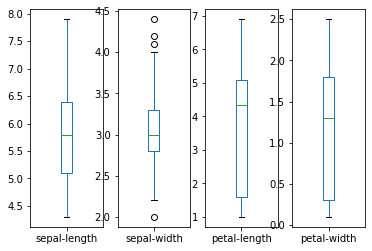

In [23]:
dataset.plot(kind='box', subplots=True,sharex=False, sharey=False)
pyplot.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0xa194f1550>]],
      dtype=object)

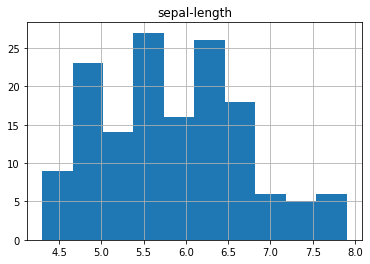

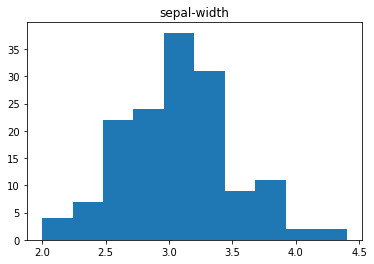

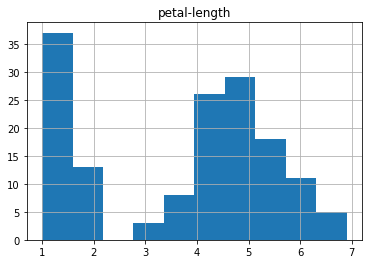

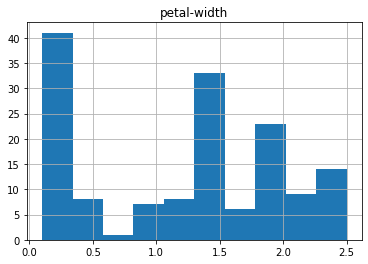

In [24]:
# column wise histograms
dataset.hist(column='sepal-length')
dataset.hist(column='sepal-width',grid=False)
dataset.hist(column='petal-length')
dataset.hist(column='petal-width')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0xa1961f4d0>,
      dtype=object)

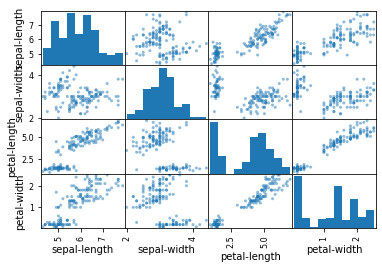

In [25]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset)

In [26]:
#  The diagonal grouping of some pairs of attributes suggests a high correlation and a predictable relationship.

1. Separate out a validation dataset.
2. Set-up the test harness to use 10-fold cross validation.
3. Build multiple different models to predict species from flower measurements
4. Select the best model.

Creating a Validation Dataset

In [60]:
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_test, Y_train, Y_test =  train_test_split(X, y,test_size=0.2, random_state = 1)
#random_state : controls the shuffling applied to the data 
#before applying the split. Pass an int for reproducible output across multiple function calls

Test Harness

stratified 10-fold cross validation to estimate model accuracy